### Wybór najlepszego K
Szukam "najlepszą" wartość K dla następujących podziałów na system treningowy i testowy:

    60% system treningowy i 40% system testowy
    65% system treningowy i 35% system testowy
    70% system treningowy i 30% system testowy
    75% system treningowy i 25% system testowy


In [1]:
import random
import pandas as pd
import numpy as np
from scipy.spatial import KDTree
from sklearn.metrics import mean_absolute_error
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
houses = pd.read_csv('wine_data/white_red.csv', sep=';')
values = houses['quality']
houses.drop('quality', 1, inplace=True)
houses = (houses - houses.mean()) / (houses.max() - houses.min())
houses = houses[['total sulfur dioxide', 'pH', 'alcohol']]

In [3]:
kdtree = KDTree(houses)

def classify(query_point, k):
    _, idx = kdtree.query(query_point, k)
    return np.argmax(np.bincount(values.iloc[idx]))

#### Dokonuję podziału na: 60% system treningowy i 40% system testowy

In [4]:
test_rows = random.sample(houses.index.tolist(), int(round(len(houses) * .40)))  
train_rows = set(range(len(houses))) - set(test_rows)
df_test = houses.loc[test_rows]
df_train = houses.drop(test_rows)
test_values = values.loc[test_rows]
train_values = values.loc[train_rows]
train_classified_values = []
test_classified_values = []
train_actual_values = []
test_actual_values = []

Wyznaczam wartości błędów dla poszczególnych K

In [5]:
x= range(2,11)
y = []
z = []

for i in x:
    for _id, row in df_train.iterrows():
        train_classified_values.append(classify(row, i))
        train_actual_values.append(train_values[_id])
    y.append((mean_absolute_error(train_classified_values, train_actual_values)))

for i in x:
    for _id, row in df_test.iterrows():
        test_classified_values.append(classify(row, i))
        test_actual_values.append(test_values[_id])
    z.append((mean_absolute_error(test_classified_values, test_actual_values)))

print('wartość błedu dla k=1,2,3...10 na systemie treningowym 60% wynosi: ',y)
print('wartość błedu dla k=1,2,3...10 na systemie testowym 40% wynosi: ',z)

wartość błedu dla k=1,2,3...10 na systemie treningowym 60% wynosi:  [0.004412292853111692, 0.0046175157765122364, 0.004549108135378722, 0.0046175157765122364, 0.0045559488994920735, 0.004600413866228858, 0.0045588806555406525, 0.004591862911087169, 0.029016241114132448]
wartość błedu dla k=1,2,3...10 na systemie testowym 40% wynosi:  [0.006079729105741111, 0.005579498229952286, 0.005746241855215228, 0.005579498229952286, 0.0056333692473449284, 0.0055410189318146836, 0.005584995272543371, 0.005521779282745882, 0.030441400304414]


Dokonuję wizualizacji danych

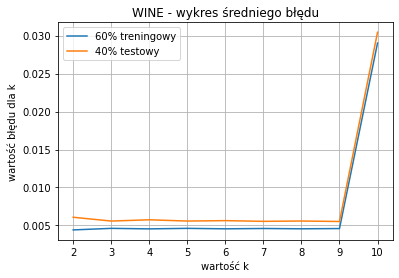

In [6]:
plt.plot(x,y)
plt.plot(x,z)
plt.grid(True)
plt.xlabel('wartość k')
plt.ylabel('wartość błędu dla k')
plt.title('WINE - wykres średniego błędu')
plt.legend(['60% treningowy', '40% testowy'])
plt.show()

#### Dokonuję podziału na: 65% system treningowy i 35% system testowy

In [7]:
test_rows1 = random.sample(houses.index.tolist(), int(round(len(houses) * .35)))  
train_rows1 = set(range(len(houses))) - set(test_rows1)
df_test1 = houses.loc[test_rows1]
df_train1 = houses.drop(test_rows1)
test_values1 = values.loc[test_rows1]
train_values1 = values.loc[train_rows1]
train_classified_values1 = []
test_classified_values1 = []
train_actual_values1 = []
test_actual_values1 = []

In [8]:
x= range(2,11)
t = []
s = []

for i in x:
    for _id, row in df_train1.iterrows():
        train_classified_values1.append(classify(row, i))
        train_actual_values1.append(train_values1[_id])
    t.append((mean_absolute_error(train_classified_values1, train_actual_values1)))

for i in x:
    for _id, row in df_test1.iterrows():
        test_classified_values1.append(classify(row, i))
        test_actual_values1.append(test_values1[_id])
    s.append((mean_absolute_error(test_classified_values1, test_actual_values1)))

print('wartość błedu dla k=1,2,3...10 na systemie treningowym 65% wynosi: ',t)
print('wartość błedu dla k=1,2,3...10 na systemie testowym 35% wynosi: ',s)

wartość błedu dla k=1,2,3...10 na systemie treningowym 65% wynosi:  [0.005351645749467203, 0.005541084537058963, 0.0054779382745283765, 0.005541084537058963, 0.005484252900781435, 0.005525297971426316, 0.005486959169175603, 0.005517404688609993, 0.030089194095824452]
wartość błedu dla k=1,2,3...10 na systemie testowym 35% wynosi:  [0.004573438874230431, 0.004001759014951627, 0.004192318968044562, 0.004001759014951627, 0.004063324538258575, 0.00395778364116095, 0.004008041211207438, 0.003935795954265612, 0.028652399100947915]


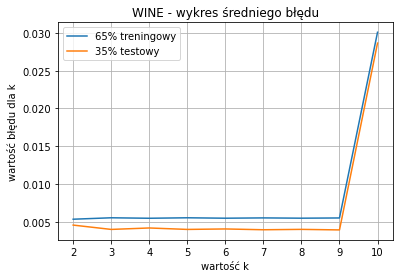

In [9]:
plt.plot(x,t)
plt.plot(x,s)
plt.grid(True)
plt.xlabel('wartość k')
plt.ylabel('wartość błędu dla k')
plt.title('WINE - wykres średniego błędu')
plt.legend(['65% treningowy', '35% testowy'])
plt.show()

#### Dokonuję podziału na: 70% system treningowy i 30% system testowy

In [10]:
test_rows2 = random.sample(houses.index.tolist(), int(round(len(houses) * .30)))  
train_rows2 = set(range(len(houses))) - set(test_rows2)
df_test2 = houses.loc[test_rows2]
df_train2 = houses.drop(test_rows2)
test_values2 = values.loc[test_rows2]
train_values2 = values.loc[train_rows2]
train_classified_values2 = []
test_classified_values2 = []
train_actual_values2 = []
test_actual_values2 = []

In [11]:
x= range(2,11)
u = []
w = []

for i in x:
    for _id, row in df_train2.iterrows():
        train_classified_values2.append(classify(row, i))
        train_actual_values2.append(train_values2[_id])
    u.append((mean_absolute_error(train_classified_values2, train_actual_values2)))

for i in x:
    for _id, row in df_test2.iterrows():
        test_classified_values2.append(classify(row, i))
        test_actual_values2.append(test_values2[_id])
    w.append((mean_absolute_error(test_classified_values2, test_actual_values2)))

print('wartość błedu dla k=1,2,3...10 na systemie treningowym 70% wynosi: ',u)
print('wartość błedu dla k=1,2,3...10 na systemie testowym 30% wynosi: ',w)

wartość błedu dla k=1,2,3...10 na systemie treningowym 70% wynosi:  [0.004881481155723647, 0.004859492501869036, 0.004866822053153906, 0.004859492501869036, 0.004855094771098113, 0.004852162950584165, 0.004850068793074203, 0.00484849817494173, 0.02933775060957435]
wartość błedu dla k=1,2,3...10 na systemie testowym 30% wynosi:  [0.005540734660373486, 0.005335522265544839, 0.005403926397154388, 0.005335522265544839, 0.0052944797865791095, 0.005267118133935289, 0.005247574096332561, 0.005232916068130515, 0.030166222039811206]


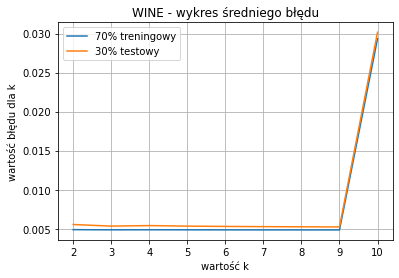

In [12]:
plt.plot(x,u)
plt.plot(x,w)
plt.grid(True)
plt.xlabel('wartość k')
plt.ylabel('wartość błędu dla k')
plt.title('WINE - wykres średniego błędu')
plt.legend(['70% treningowy', '30% testowy'])
plt.show()

#### Dokonuję podziału na: 75% system treningowy i 25% system testowy

In [13]:
test_rows3 = random.sample(houses.index.tolist(), int(round(len(houses) * .25)))  
train_rows3 = set(range(len(houses))) - set(test_rows3)
df_test3 = houses.loc[test_rows3]
df_train3 = houses.drop(test_rows3)
test_values3 = values.loc[test_rows3]
train_values3 = values.loc[train_rows3]
train_classified_values3 = []
test_classified_values3 = []
train_actual_values3 = []
test_actual_values3 = []

In [14]:
x= range(2,11)
m = []
n = []

for i in x:
    for _id, row in df_train3.iterrows():
        train_classified_values3.append(classify(row, i))
        train_actual_values3.append(train_values3[_id])
    m.append((mean_absolute_error(train_classified_values3, train_actual_values3)))

for i in x:
    for _id, row in df_test3.iterrows():
        test_classified_values3.append(classify(row, i))
        test_actual_values3.append(test_values3[_id])
    n.append((mean_absolute_error(test_classified_values3, test_actual_values3)))

print('wartość błedu dla k=1,2,3...10 na systemie treningowym 75% wynosi: ',m)
print('wartość błedu dla k=1,2,3...10 na systemie testowym 25% wynosi: ',n)

wartość błedu dla k=1,2,3...10 na systemie treningowym 75% wynosi:  [0.005212608767033328, 0.005130520439993433, 0.005157883215673398, 0.005130520439993433, 0.0050894762764734855, 0.0050826355825534944, 0.00506015901681638, 0.005058693153833525, 0.029857348729455117]
wartość błedu dla k=1,2,3...10 na systemie testowym 25% wynosi:  [0.004679226696219677, 0.004617657923900997, 0.004638180848007224, 0.004617657923900997, 0.004679226696219677, 0.004658703772113451, 0.004696817774025015, 0.004679226696219677, 0.02877313959692977]


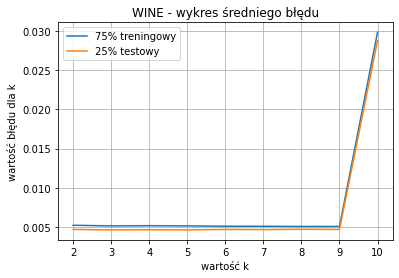

In [15]:
plt.plot(x,m)
plt.plot(x,n)
plt.grid(True)
plt.xlabel('wartość k')
plt.ylabel('wartość błędu dla k')
plt.title('WINE - wykres średniego błędu')
plt.legend(['75% treningowy', '25% testowy'])
plt.show()

#### Poniżej zestawienie wszystkich otrzymanych wykresów celem wyboru najlepszego podziału oraz najlepszego K

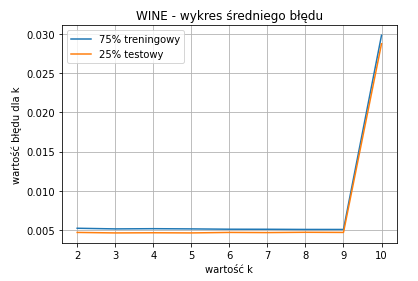 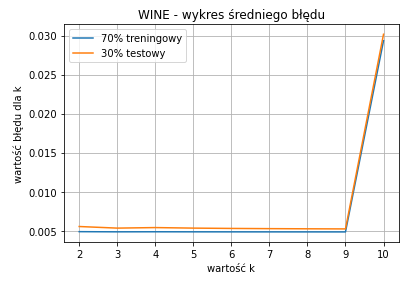 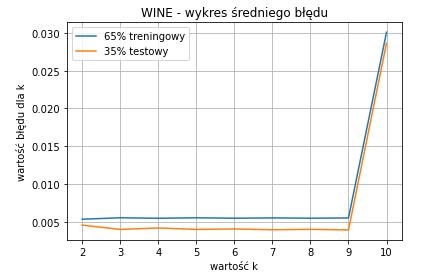 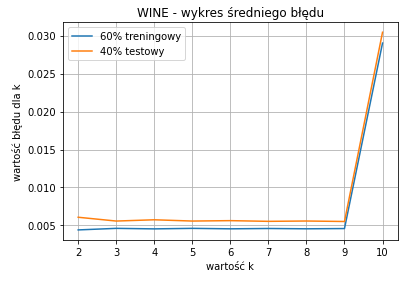

Najlepsza wartość K=3. 
Ponieważ najmniesza różnica błędów między systemem treningowym i testowym występuję w podziale na 75% system treningowy i 25% system testowy, ten podział będę stosowała w moim modelu. 